# Author : Sukarn Pahuja
## The Sparks Foundation : Data Science and Business Analytics (GRIP JUNE'21)

# TASK-6 : Prediction Using Decision Tree Algorithm
- Create the Decision Tree classifier and visualize it graphically. 
- The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 
- Dataset : https://bit.ly/3kXTdox

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pydot
from IPython.display import Image

In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

### Loading Data

In [4]:
df = pd.read_csv('Iris.csv',index_col='Id')
df.head()
print('Data Loading.....')

Data Loading.....


### Data Description

In [5]:
# structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
# statistical description of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#coloumns and shape
print('Shape --->',df.shape)
print('*****************')
print('Coloumns -->',df.columns)

Shape ---> (150, 5)
*****************
Coloumns --> Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


### Visualizing the Data

<Figure size 600x400 with 0 Axes>

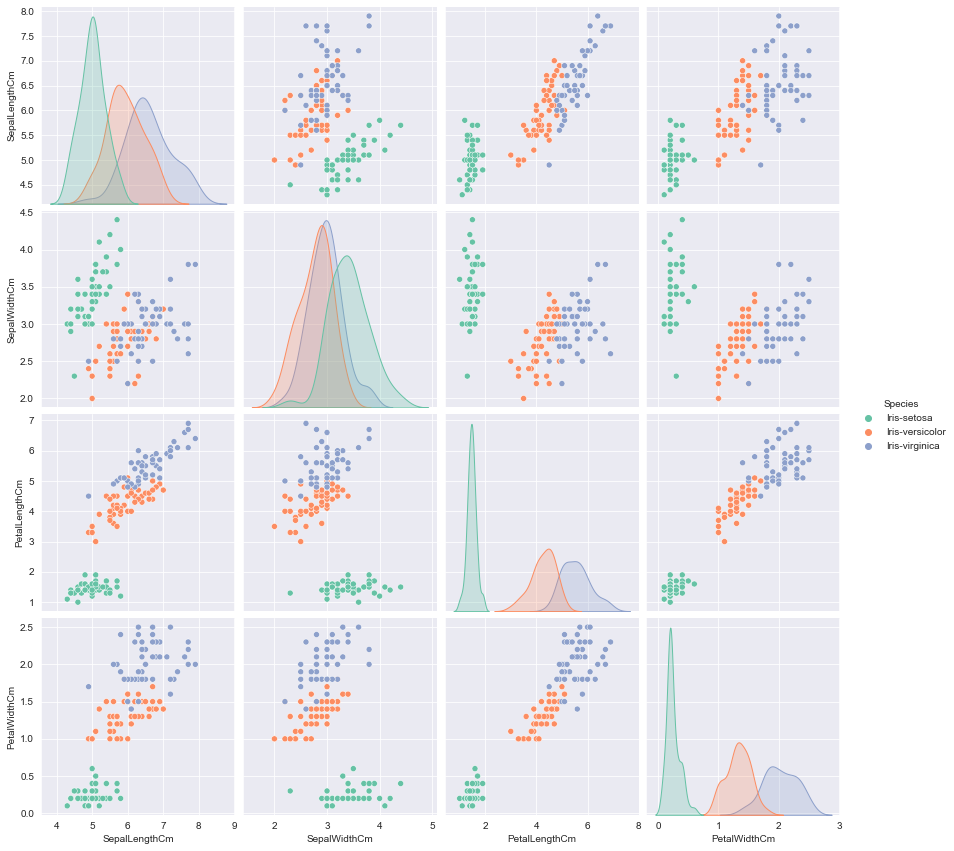

In [8]:
# comparing all together
plt.figure(dpi=100)
sns.set_style('darkgrid')
sns.pairplot(df,hue='Species',aspect=1,palette='Set2',height=3)
plt.show()

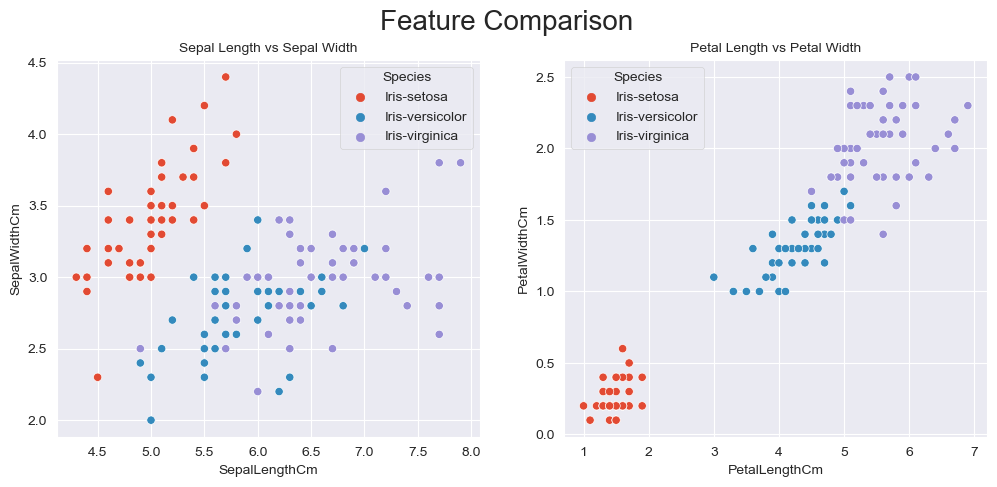

In [9]:
# visualizing every feature
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5),dpi=100)
plt.style.use('ggplot')
sns.set_style('darkgrid')
plt.suptitle('Feature Comparison',size=20)
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species',ax=axes[0])
axes[0].set_title('Sepal Length vs Sepal Width',size=10)
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species',ax=axes[1])
axes[1].set_title('Petal Length vs Petal Width',size=10)
plt.show()

### Decision Tree Model Training and Testing

In [10]:
#Recode the categorical variables
#df['Species'] = df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace = True)
#df.sample(6)

X = df.iloc[:,0:4]
y = df.Species

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=47)

In [12]:
tree = DecisionTreeClassifier(random_state=47)
tree.fit(X_train,y_train)

#checking accuracy
print('Training Set Accuracy --> ',tree.score(X_train,y_train))
print('Test Set Accuracy --> {:.2f} '.format(tree.score(X_test,y_test)))

Training Set Accuracy -->  1.0
Test Set Accuracy --> 0.96 


**Overfitting Model is obtained. Thus need to set the maximum depth of the tree to avoid Overfitting. (TrainScore > TestScore)**

In [13]:
#solving the problem of overfitting
for i in range(1,10):
    tree = DecisionTreeClassifier(max_depth=i,random_state=47)
    tree.fit(X_train,y_train)
    if tree.score(X_train,y_train) < tree.score(X_test,y_test):
        print('Training Set Accuracy --> {:.2f}'.format(tree.score(X_train,y_train)))
        print('Test Set Accuracy --> {:.2f}'.format(tree.score(X_test,y_test)))
        print('Max depth is',i)

Training Set Accuracy --> 0.95
Test Set Accuracy --> 0.98
Max depth is 2


### Model Efficiency

In [18]:
from sklearn.metrics import plot_confusion_matrix,classification_report

<Figure size 800x800 with 0 Axes>

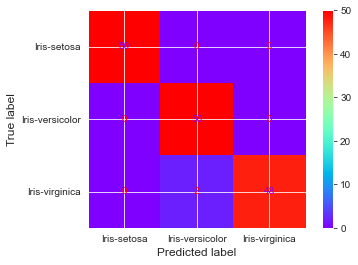

In [25]:
plt.figure(figsize=(8,8),dpi=100)
plot_confusion_matrix(tree,X,y,cmap='rainbow')
plt.show()

In [31]:
#checking efficiency
eff = classification_report(y,tree.predict(X))
print('********EFFICIENCY DETAILS**************')
print(eff)

********EFFICIENCY DETAILS**************
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      1.00      0.98        50
 Iris-virginica       1.00      0.96      0.98        50

       accuracy                           0.99       150
      macro avg       0.99      0.99      0.99       150
   weighted avg       0.99      0.99      0.99       150



### Predicting the Output

In [32]:
#predictions
tree.predict([[5.9,2.3,5.4,1.0]])
tree.predict_proba([[5.9,2.3,5.4,1.0]])

array([[0., 1., 0.]])

In [33]:
#outputs
print('*****************************')
print('        PREDICTIONS          ')
print('*****************************')
print('The model predicts that the new flowers belongs to Iris-Versicolor with an effective rate of 90.9%.')

*****************************
        PREDICTIONS          
*****************************
The model predicts that the new flowers belongs to Iris-Versicolor with an effective rate of 90.9%.


## Thank You